# Jupyter Notebook to demonstrate **Data Import/Export** with **Pandas**  

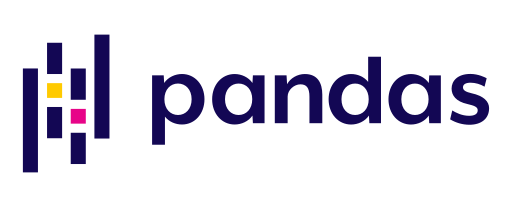

### What is Pandas?

Pandas is a Python library used for working with data sets. Pandas is built around data structures called Series and **DataFrames**. A DataFrame is a 2-dimensional data structure of rows and columns, similar to a spreadsheet.

Data for these collections can be **imported from various file formats** such as *comma-separated values* (CSV), JSON, Parquet, *SQL database tables or queries*, and *Microsoft Excel*.

The name "Pandas" has a reference to both "**Pan**el **Da**ta" (an econometrics term for data sets that include observations over multiple time periods for the same individuals), and "Python Data Analysis"

Pandas was created by **Wes McKinney** in 2008.  The development of Pandas introduced into Python many comparable features of working with DataFrames that were established in the R programming language. The library is built upon another library, [NumPy](https://numpy.org/).


---   
Source/Links:
+ [Pandas Library](https://pandas.pydata.org/)  
+ [Pandas Cookbook](https://pandas.pydata.org/docs/user_guide/cookbook.html#cookbook)


History:
+ March 2024, v1, dbe -- adapted for BINA FS24 with focus on data import/load from external files/sources

---

# Setup Environment   

Customarily, we import **`pandas`** as follows:


In [5]:
import pandas as pd

Check the local filesystem with ``%ls`` (*lists*) and switch to the "sample_data" folder with ``%cd`` (*change directory*) commands

In [6]:
%ls

sample_data/


---  
# Importing (Loading) Data   

> **Importing data is the first step in any data science project!**

## Comma Separated Files (CSV)


A simple way to store big data sets is to use CSV files (comma separated files).  

For data available in a tabular format and stored as a CSV file, you can use pandas to read it into memory using the ``read_csv()`` function, which returns a pandas dataframe.

+ [Reading from a csv file@Pydata](https://pandas.pydata.org/docs/user_guide/io.html#io-read-csv-table): using [`read_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html#pandas.read_csv)
+ [Pandas Read CSV@W3Schools](https://www.w3schools.com/python/pandas/pandas_csv.asp)

---  
#### **Read** data from a CSV file in the (colab) **local file** system

> **Note: you must first upload the data file into your colab environment as colab cannot access files in your (machine) local filesystem!**


In [7]:
# check for sample csv file "student.csv" ind the sample_content folder
%ls sample_data

anscombe.json*               california_housing_train.csv  mnist_train_small.csv  student.csv
california_housing_test.csv  mnist_test.csv                README.md*


In [8]:
sourceFILE = 'sample_data/student.csv'
data = pd.read_csv(sourceFILE)
print(data)

    id         name  class  mark  gender
0    1     John Deo   Four    75  female
1    2     Max Ruin  Three    85    male
2    3       Arnold  Three    55    male
3    4   Krish Star   Four    60  female
4    5    John Mike   Four    60  female
5    6    Alex John   Four    55    male
6    7  My John Rob  Fifth    78    male
7    8       Asruid   Five    85    male
8    9      Tes Qry    Six    78    male
9   10     Big John   Four    55  female
10  11       Ronald    Six    89  female
11  12        Recky    Six    94  female
12  13          Kty  Seven    88  female
13  14         Bigy  Seven    88  female
14  15     Tade Row   Four    88    male
15  16        Gimmy   Four    88    male
16  17        Tumyu    Six    54    male
17  18        Honny   Five    75    male
18  19        Tinny   Nine    18    male
19  20       Jackly   Nine    65  female
20  21   Babby John   Four    69  female
21  22       Reggid  Seven    55  female
22  23        Herod  Eight    79    male
23  24    Tiddy 

In [9]:
data.head()

,id,name,class,mark,gender
0,1,John Deo,Four,75,female
1,2,Max Ruin,Three,85,male
2,3,Arnold,Three,55,male
3,4,Krish Star,Four,60,female
4,5,John Mike,Four,60,female


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      35 non-null     int64 
 1   name    35 non-null     object
 2   class   35 non-null     object
 3   mark    35 non-null     int64 
 4   gender  35 non-null     object
dtypes: int64(2), object(3)
memory usage: 1.5+ KB


+ **usecols**: Specify which columns to import to the dataframe. It can be a list of int values or column names   
+ **sep**: Specify a custom delimiter for the CSV input, the default is a comma (``,``)  
+ **header**: this allows you to specify which row will be used as column names for your dataframe. Expected an int value or a list of int values. Default value is ``header=0``, which means the first row of the CSV file will be treated as column names. If your file doesn’t have a header, simply set ``header=None``.

In [11]:
# defining the columns to read and define "," as column separator
selColumns = ["name", "class", "mark"]

data = pd.read_csv(sourceFILE, usecols=selColumns, sep=',', header=0)
data.head()

,name,class,mark
0,John Deo,Four,75
1,Max Ruin,Three,85
2,Arnold,Three,55
3,Krish Star,Four,60
4,John Mike,Four,60


---  
### **Read** data from a CSV file in a **Github** repository / Reading data from a webpage using a **URL**

> Note: the github repository must be "public" accessible.    
> Use the full **URL** selected by the "**raw**" view option

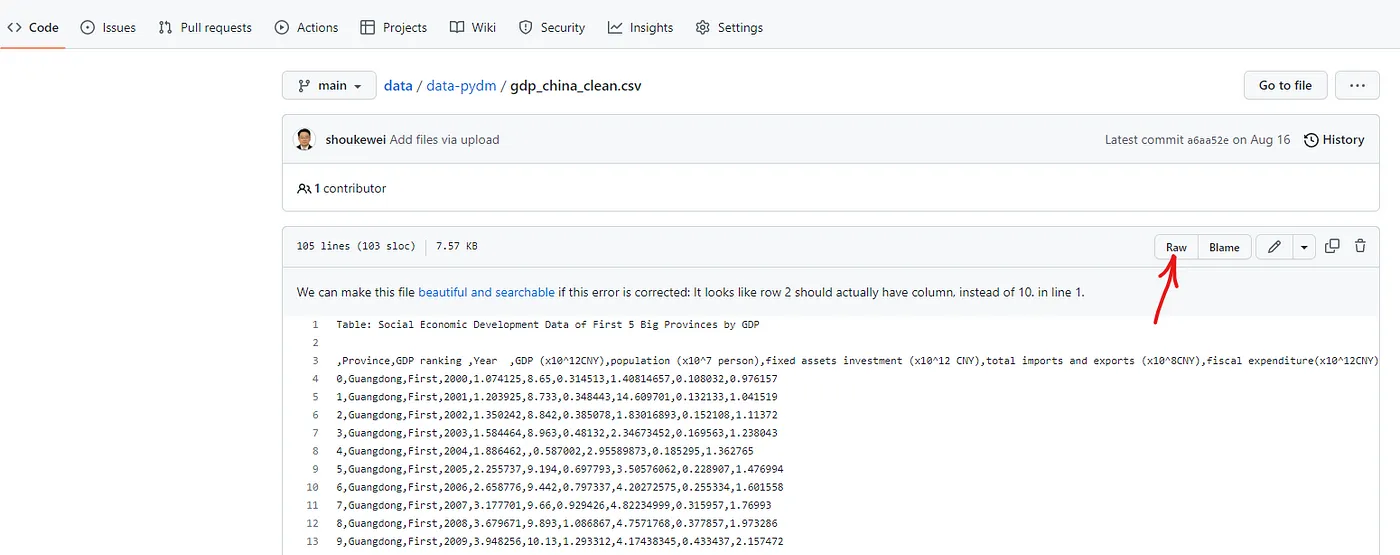

+ **names**: Specify new names to the import to the dataframe. It must be a list of (new) column names
+ **nrows**: Only read the number of first rows (incl. header row) from the file. Needs an int value.

In [16]:
sourceFILE = 'https://raw.githubusercontent.com/sawubona-repo/BINA-FS24-WORK/main/LB03-DataMiningProcess/DATA/student.csv'

# defining (new) column names
setNames = ["Name","Klasse","Note","Geschlecht"]

data = pd.read_csv(sourceFILE, names=setNames, nrows=4)
data.head()

,Name,Klasse,Note,Geschlecht
id,name,class,mark,gender
1,John Deo,Four,75,female
2,Max Ruin,Three,85,male
3,Arnold,Three,55,male


+ **converters**: Helps to convert values in the columns by defined functions.

In [17]:
f = lambda x : (int(x) / 100) * 6
data = pd.read_csv(sourceFILE, converters={'mark':f})
data.head()

,id,name,class,mark,gender
0,1,John Deo,Four,4.5,female
1,2,Max Ruin,Three,5.1,male
2,3,Arnold,Three,3.3,male
3,4,Krish Star,Four,3.6,female
4,5,John Mike,Four,3.6,female


---  
### **Read** data from a **Zipped CSV file**

For very large files with many repeated values [Zipping](https://en.wikipedia.org/wiki/ZIP_(file_format)) can save a substantial amount of disk space. These files are easier and faster to share via the web.   
Zip files are ideal for archivinga nd, they are also useful for securing data using the encryption method.

> By assigning the **compression argument** in `read_csv()` method as zip, then pandas will first decompress the zip and then will create the dataframe from CSV file present in the zipped file.



In [19]:
sourceFILE = 'https://raw.githubusercontent.com/sawubona-repo/BINA-FS24-WORK/main/LB03-DataMiningProcess/DATA/student.zip'

data = pd.read_csv(sourceFILE, compression='zip')
data.head()

,id,name,class,mark,gender
0,1,John Deo,Four,75,female
1,2,Max Ruin,Three,85,male
2,3,Arnold,Three,55,male
3,4,Krish Star,Four,60,female
4,5,John Mike,Four,60,female


---   
## Excel Files (XLS)

+ Reading and writing to [Excel](https://pandas.pydata.org/docs/user_guide/io.html#io-excel) with **Reading from an excel file** using [`read_excel()`](https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html#pandas.read_excel)


In [20]:
sourceFILE  = 'https://raw.githubusercontent.com/sawubona-repo/BINA-FS24-WORK/main/LB03-DataMiningProcess/DATA/student.xlsx'
sourceSHEET = "student"

# selected excel columns by considering first row as header, mark missing values as "NA"
selColumns = ['name','mark','gender']

dataXLS = pd.read_excel(sourceFILE, sourceSHEET, header=0, usecols=selColumns, na_values=["NA"])
dataXLS.head()

,name,mark,gender
0,John Deo,75,female
1,Max Ruin,85,male
2,Arnold,55,male
3,Krish Star,60,female
4,John Mike,60,female


---  
## JavaScript Object Notation (JSON)  

Big data sets are often stored, or extracted as [**JSON**](https://www.json.org/json-de.html).   

JSON is plain text, but has the format of an object, and is well known in the world of programming, including Pandas.  




Let's have a look at an example:

>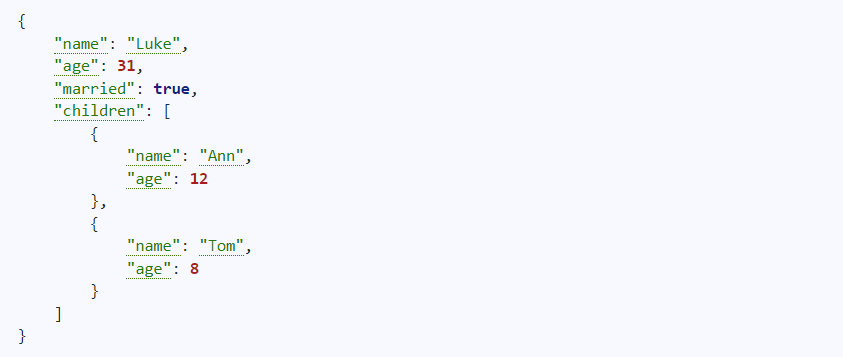

+ Reading from an JSON file using [`DataFrame.read_json()`](https://pandas.pydata.org/docs/reference/api/pandas.read_json.html)

In [21]:
sourceFILE  = 'https://raw.githubusercontent.com/sawubona-repo/BINA-FS24-WORK/main/LB03-DataMiningProcess/DATA/student.json'

# Convert JSON to DataFrame Using read_json()
dataJSON = pd.read_json(sourceFILE)

dataJSON.head()

,id,name,class,mark,gender
0,1,John Deo,Four,75,female
1,2,Max Ruin,Three,85,male
2,3,Arnold,Three,55,male
3,4,Krish Star,Four,60,female
4,5,John Mike,Four,60,female


---  
# Exporting (Storing) Data   

> Storing cleansed/wrangled/transformed data is a common way to make data available for further analytical actions

## Comma Separated Files (CSV)

---  
### **Write** dataframe to a **CSV** file in the (colab) local file system

+ [Writing to a csv file@Pydata](https://pandas.pydata.org/docs/user_guide/io.html#io-store-in-csv): using [`DataFrame.to_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html#pandas.DataFrame.to_csv)

+ **sep**: specifies the separator that should be used to separate values in the CSV file. By default, it is set to (`,`) for comma-separated values. We can also set it to a different separator like `\t` for tab-separated values.

+ **index**: is a boolean value that determines whether to include the index of the DataFrame in the CSV file. By default, it is set to False, which means the index is not included.

+ **encoding**: specifies the character encoding to be used for the CSV file. By default, it is set to `utf-8`, which is a standard encoding for text files.

In [22]:
%cd /content
%ls sample_data/


/content
anscombe.json*               california_housing_train.csv  mnist_train_small.csv  student.csv
california_housing_test.csv  mnist_test.csv                README.md*


In [23]:
storeFILE = 'sample_data/student-from-JSON.csv'
dataJSON.to_csv(storeFILE, sep=',', index=False, encoding='utf-8' )

In [24]:
%ls sample_data/

anscombe.json*                mnist_test.csv         student.csv
california_housing_test.csv   mnist_train_small.csv  student-from-JSON.csv
california_housing_train.csv  README.md*


---   
## Excel Files (XLS)


### **Write** dataframe to an **Excel** file in the (colab) local file system

+ Writing to an excel file using [`DataFrame.to_excel()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_excel.html#pandas.DataFrame.to_excel)

In [25]:
storeFILE = 'sample_data/student-from-JSON.xlsx'
dataJSON.to_excel(storeFILE, sheet_name="Sheet1")

---   
## JavaScript Object Notation (JSON)

### **Write** dataframe to a **JSON** file in the (colab) local file system  

+ Writing to an JSON file using [`DataFrame.to_json()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_json.html#pandas.DataFrame.to_json)

In [26]:
storeFILE = 'sample_data/student.json'
data.to_json(storeFILE)

---  
# Using **Google Drive** to read data from or to write data onto

## Importing (**Loading**) Data from **Google Drive**   

Here are the steps to read a CSV file from your Google Drive into a dataframe in your Google Colab notebook:

1. **Upload the CSV file to your Google Drive**   
(e.g. into Folder *`Colab Notebooks/DATA`*)


2. **Mount your Google Drive** in Colab by running the following code

In [27]:
from google.colab import drive
drive.mount('/content/MyGoogleDrive')

Mounted at /content/MyGoogleDrive


+ Authorisation Access: When you run the above code cell, you will be requested with a prompt **asking for permission to grant Google Colab access to your Google Drive files**, as shown in the image below.

> 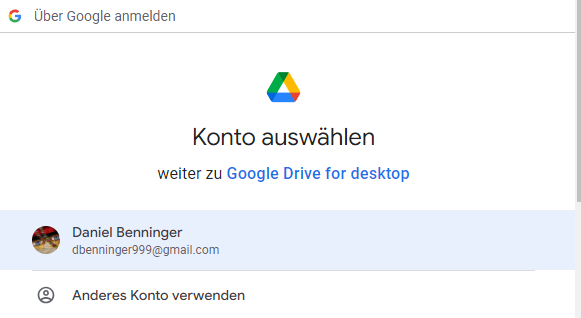

+ As a result you get **a new (mounted) folder** in your colab local filesystem.   

> **Note**: This is only a "link" to your Google Drive filesystem.  
<br>


> 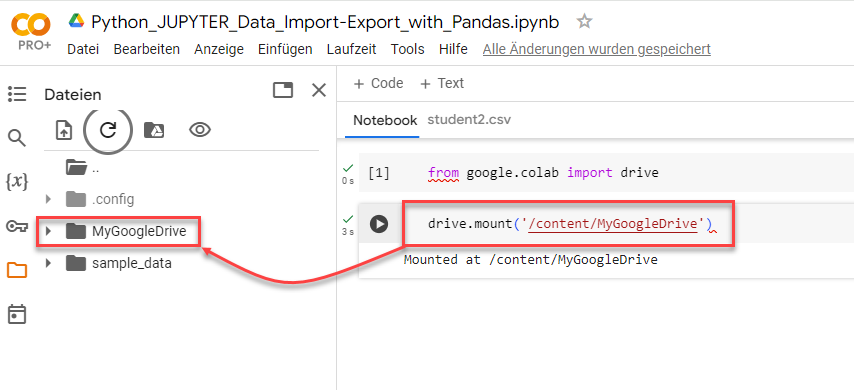

Now, you can easily **read your dataset file from the Google Drive**. But, before this, check for your present working directory using the command ```!pwd```

  **pwd** stands for *print working directory*. It is a command that is used in Unix-like operating systems, such as Linux and macOS, to display the current working directory, or the location or working directory in the file system that you are now using in the command line interface.

  When you run the pwd command, the entire path to the current directory will be printed to the terminal. This is useful when exploring directories and interacting with files and directories via the command line because it helps you remember where you are in the file system.

  **ls*** is a command commonly used in Unix-like operating systems, including Linux and macOS, for listing the files and directories in the current directory (or a specified directory). It provides a way to view the contents of a directory from the command line.

In [28]:
!pwd

/content


In [29]:
%ls

MyGoogleDrive/  sample_data/


In [30]:
%cd /content/MyGoogleDrive/My Drive/Colab Notebooks/DATA

/content/MyGoogleDrive/My Drive/Colab Notebooks/DATA


3. **Loading CSV Dataset**  
 Now, depending on the structure of your dataset, you can load it into your Colab notebook using the Pandas function ```read_csv() for tabular data.

  Finally, you can now work with the dataset in your Google Colab, similar to as you would have upload it into the (Colab) local filesystem

In [31]:
sourceFILE = '/content/MyGoogleDrive/My Drive/Colab Notebooks/DATA/student.csv'
dataGD = pd.read_csv(sourceFILE)
print(dataGD)

    id         name  class  mark  gender
0    1     John Deo   Four    75  female
1    2     Max Ruin  Three    85    male
2    3       Arnold  Three    55    male
3    4   Krish Star   Four    60  female
4    5    John Mike   Four    60  female
5    6    Alex John   Four    55    male
6    7  My John Rob  Fifth    78    male
7    8       Asruid   Five    85    male
8    9      Tes Qry    Six    78    male
9   10     Big John   Four    55  female
10  11       Ronald    Six    89  female
11  12        Recky    Six    94  female
12  13          Kty  Seven    88  female
13  14         Bigy  Seven    88  female
14  15     Tade Row   Four    88    male
15  16        Gimmy   Four    88    male
16  17        Tumyu    Six    54    male
17  18        Honny   Five    75    male
18  19        Tinny   Nine    18    male
19  20       Jackly   Nine    65  female
20  21   Babby John   Four    69  female
21  22       Reggid  Seven    55  female
22  23        Herod  Eight    79    male
23  24    Tiddy 

---  
## Storing (**Exporting**) Data to Google Drive   

Storing a file (CSV, Excel, JSON) is easily done using the appropriate Pandas function

> Note: Specify the full **directory+file** name!

In [32]:
storeFILEgd = '/content/MyGoogleDrive/My Drive/Colab Notebooks/DATA/student-from-JSON.xlsx'
dataJSON.to_excel(storeFILEgd, sheet_name="Sheet1")

In [33]:
%ls  '/content/MyGoogleDrive/My Drive/Colab Notebooks/DATA'

student.csv  student-from-JSON.xlsx  train.csv
